In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, r2_score, precision_score

In [2]:
# Load the Basic CSV file into a DataFrame
basic_path = 'Basic_table.csv'
df_basic = pd.read_csv(basic_path )
df_basic.head()

# Load the Trim CSV file into a DataFrame
trim_path = 'Trim_table.csv'
df_trim = pd.read_csv(trim_path)
df_trim.head()

# Load the Sales CSV file into a DataFrame
sales_path = 'Sales_table.csv'
df_sales = pd.read_csv(sales_path)
df_sales.head()

,Maker,Genmodel,Genmodel_ID,2020,2019,2018,2017,2016,2015,2014,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,ABARTH,ABARTH 124,2_1,0,19,27,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABARTH,ABARTH 500,2_2,0,0,1,2,66,717,762,...,915,766,0,0,0,0,0,0,0,0
2,ABARTH,ABARTH 595,2_4,2144,2866,3907,3295,3132,1612,516,...,0,0,0,0,0,0,0,0,0,0
3,ABARTH,ABARTH 695,2_6,45,65,270,114,29,10,14,...,0,0,0,0,0,0,0,0,0,0
4,ABARTH,ABARTH PUNTO,2_9,0,0,0,0,0,0,56,...,97,172,74,0,0,0,0,0,0,0


##Data Cleaning and Preprocessing


In [ ]:
# Dropping unwanted columns
df_trim = df_trim.drop(columns=['Maker','Genmodel'])
df_sales = df_sales.drop(columns=['Maker','Genmodel'])

# Merge the tables
merged_data_left = pd.merge(df_basic,df_trim, on='Genmodel_ID', how='outer')
merged_data_left.head()

# Merge the tables
merged_data_left = pd.merge(merged_data_left,df_sales, on='Genmodel_ID',how='outer')

# Droping NaN Values
merged_data_left = merged_data_left.drop(merged_data_left.index[0])
merged_data_left = merged_data_left.dropna()

In [3]:
df_trim = df_trim.drop(columns=['Maker','Genmodel'])

In [4]:
df_trim.head()

,Genmodel_ID,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,2_1,124 Spider1.4 Turbo MultiAir 170hp 2d,2016,29365,148,Petrol,1368
1,2_1,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2016,31365,153,Petrol,1368
2,2_1,124 Spider1.4 Turbo MultiAir 170hp 2d,2017,29365,148,Petrol,1368
3,2_1,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2017,31365,153,Petrol,1368
4,2_1,124 SpiderScorpione 1.4 Turbo MultiAir 170hp 2d,2017,26665,148,Petrol,1368


In [5]:
df_sales = df_sales.drop(columns=['Maker','Genmodel'])
df_sales.head()

,Genmodel_ID,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,2_1,0,19,27,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2_2,0,0,1,2,66,717,762,545,763,...,915,766,0,0,0,0,0,0,0,0
2,2_4,2144,2866,3907,3295,3132,1612,516,491,165,...,0,0,0,0,0,0,0,0,0,0
3,2_6,45,65,270,114,29,10,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2_9,0,0,0,0,0,0,56,75,90,...,97,172,74,0,0,0,0,0,0,0


In [6]:
# Merge the tables
merged_data_left = pd.merge(df_basic,df_trim, on='Genmodel_ID', how='outer')
merged_data_left.head()

,Automaker,Automaker_ID,Genmodel,Genmodel_ID,Trim,Year,Price,Gas_emission,Fuel_type,Engine_size
0,AC,1,Cobra,1_1,NaN,NaN,NaN,NaN,NaN,NaN
1,Abarth,2,124 Spider,2_1,124 Spider1.4 Turbo MultiAir 170hp 2d,2016.0,29365.0,148.0,Petrol,1368.0
2,Abarth,2,124 Spider,2_1,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2016.0,31365.0,153.0,Petrol,1368.0
3,Abarth,2,124 Spider,2_1,124 Spider1.4 Turbo MultiAir 170hp 2d,2017.0,29365.0,148.0,Petrol,1368.0
4,Abarth,2,124 Spider,2_1,124 Spider1.4 Turbo MultiAir 170hp Sequenziale...,2017.0,31365.0,153.0,Petrol,1368.0


In [7]:
# Merge the tables
merged_data_left = pd.merge(merged_data_left,df_sales, on='Genmodel_ID',how='outer')

In [8]:
merged_data_left = merged_data_left.drop(merged_data_left.index[0])
merged_data_left = merged_data_left.dropna()

In [9]:
merged_data_left.shape

(353556, 30)

In [10]:
merged_data_left.info

<bound method DataFrame.info of        Automaker  Automaker_ID    Genmodel Genmodel_ID  \
1         Abarth             2  124 Spider         2_1   
2         Abarth             2  124 Spider         2_1   
3         Abarth             2  124 Spider         2_1   
4         Abarth             2  124 Spider         2_1   
5         Abarth             2  124 Spider         2_1   
...          ...           ...         ...         ...   
367849     Volvo            96        XC40       96_20   
367850     Volvo            96        XC40       96_20   
367851     Volvo            96        XC40       96_20   
367852     Volvo            96        XC40       96_20   
367853     Volvo            96        XC40       96_20   

                                                     Trim    Year    Price  \
1                   124 Spider1.4 Turbo MultiAir 170hp 2d  2016.0  29365.0   
2                   124 Spider1.4 Turbo MultiAir 170hp 2d  2016.0  29365.0   
3       124 Spider1.4 Turbo MultiAir 

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_data_left['Automaker'] = label_encoder.fit_transform(merged_data_left['Automaker'])
merged_data_left['Genmodel'] = label_encoder.fit_transform(merged_data_left['Genmodel'])
merged_data_left['Trim'] = label_encoder.fit_transform(merged_data_left['Trim'])
merged_data_left['Fuel_type'] = label_encoder.fit_transform(merged_data_left['Fuel_type'])

In [8]:
merged_data_left.info

<bound method DataFrame.info of         Automaker  Automaker_ID  Genmodel Genmodel_ID   Trim    Year    Price  \
1               0             2         7         2_1   1446  2016.0  29365.0   
2               0             2         7         2_1   1447  2016.0  31365.0   
3               0             2         7         2_1   1446  2017.0  29365.0   
4               0             2         7         2_1   1447  2017.0  31365.0   
5               0             2         7         2_1   1455  2017.0  26665.0   
...           ...           ...       ...         ...    ...     ...      ...   
335915         59            96       592       96_20  64458  2018.0  35250.0   
335916         59            96       592       96_20  64459  2018.0  36750.0   
335917         59            96       592       96_20  64460  2018.0  29200.0   
335918         59            96       592       96_20  64461  2018.0  33350.0   
335919         59            96       592       96_20  64462  2018.0  34850.0

<ipython-input-13-65f083d0dd9f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data_left.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


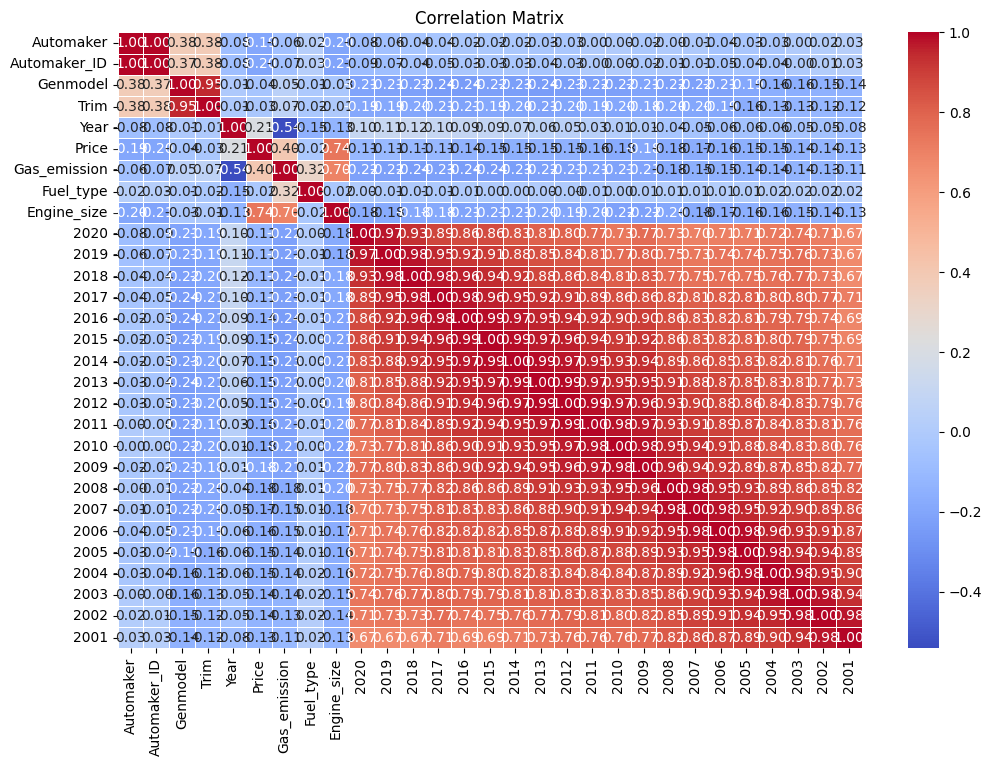

In [13]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data_left.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

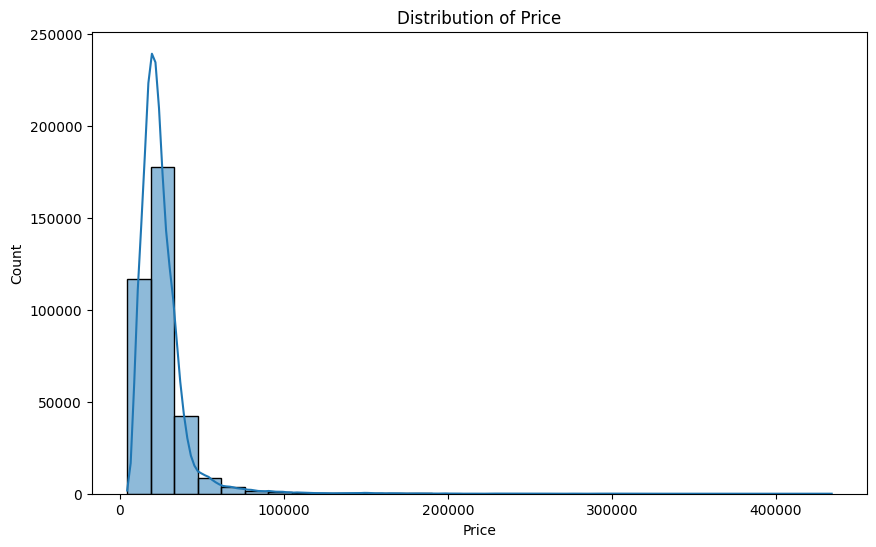

In [14]:
# Visualize distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_left['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

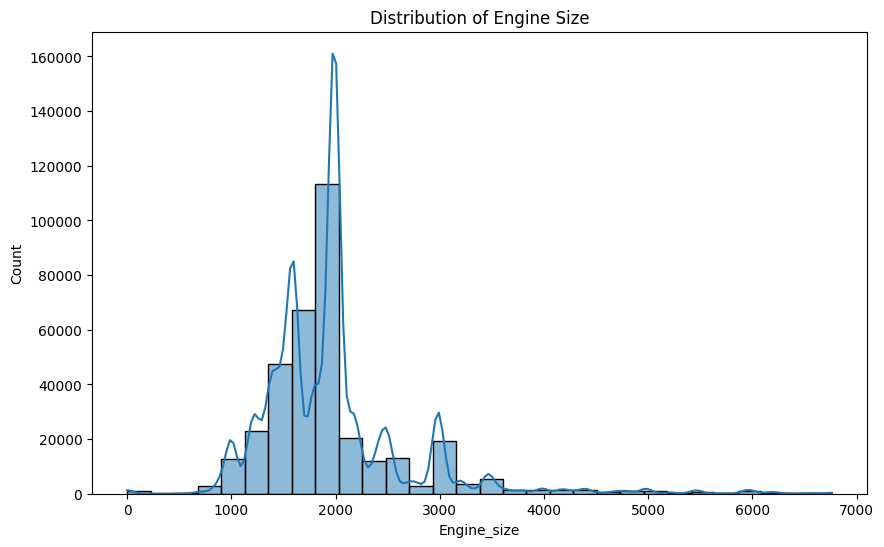

In [15]:
# Visualize distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_left['Engine_size'], bins=30, kde=True)
plt.title('Distribution of Engine Size')
plt.show()

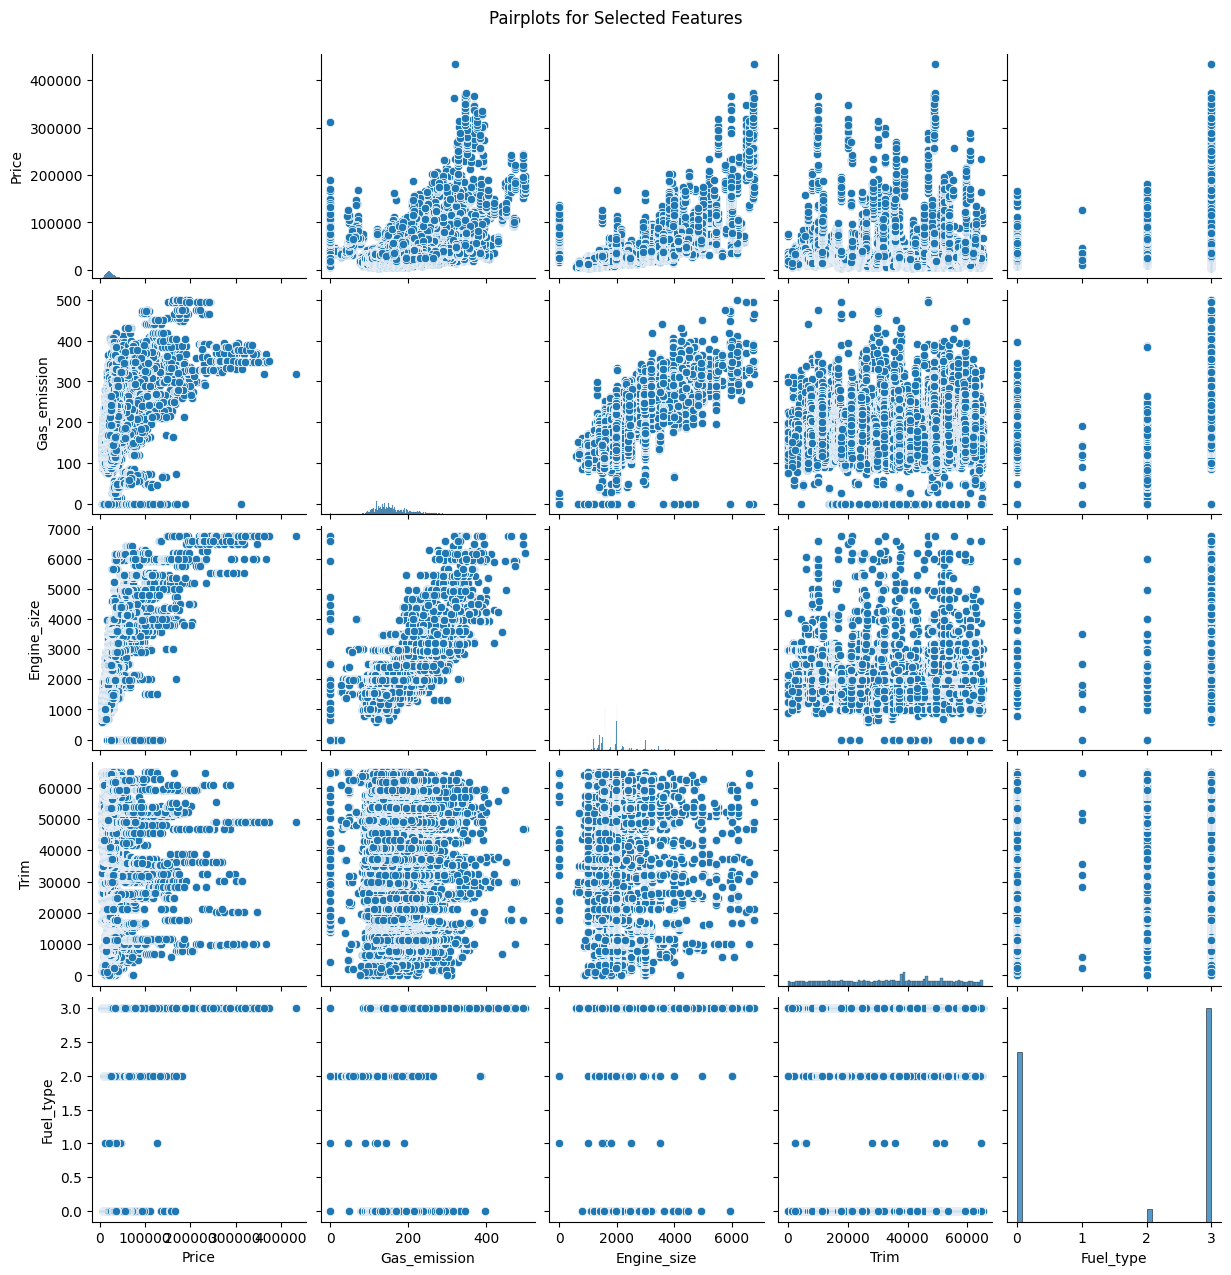

In [16]:
# Visualize pairplots for selected features
selected_features = ['Price', 'Gas_emission', 'Engine_size', 'Trim', 'Fuel_type']
sns.pairplot(merged_data_left[selected_features])
plt.suptitle('Pairplots for Selected Features', y=1.02)
plt.show()

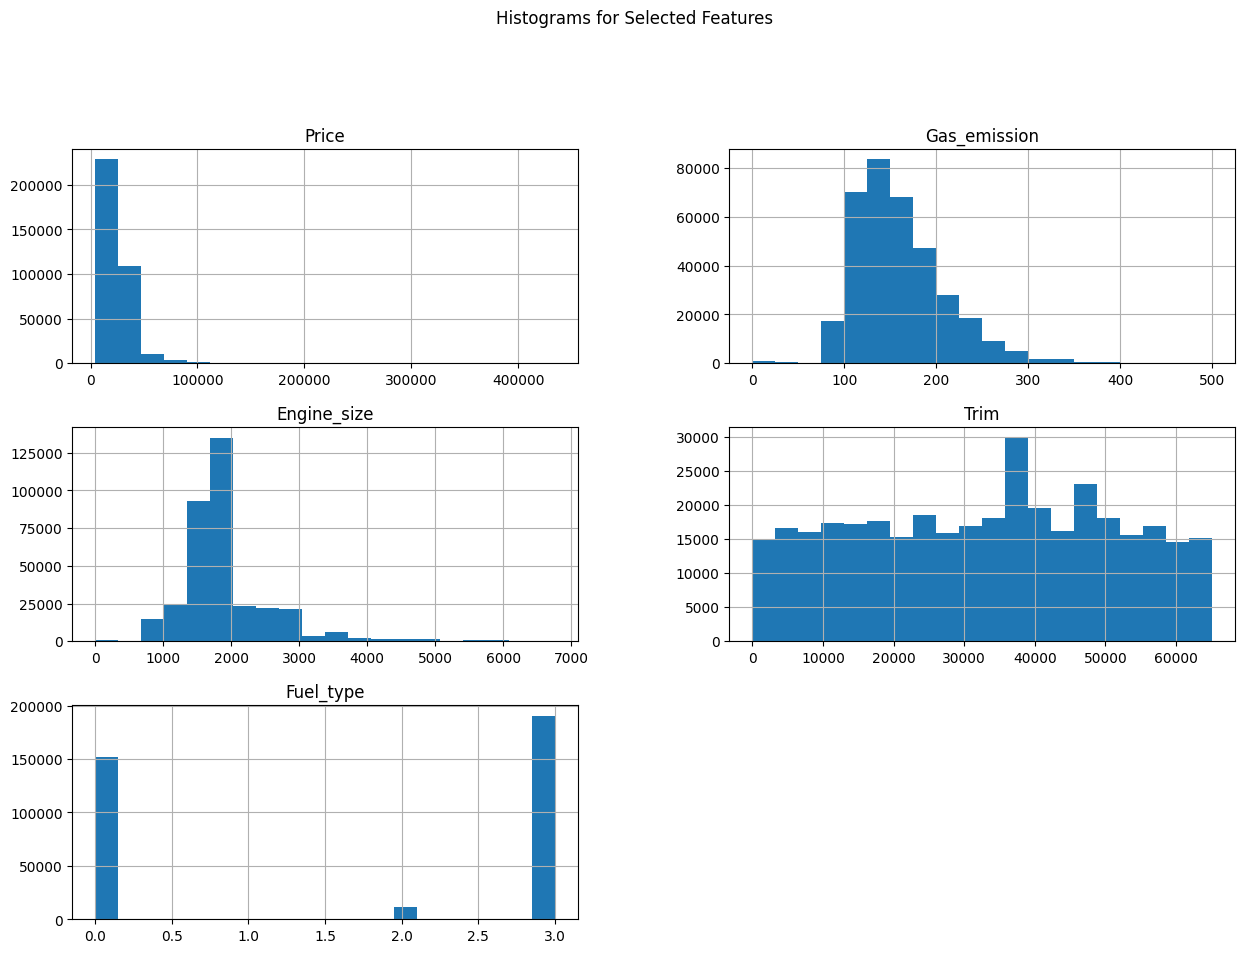

In [17]:
# Histograms for selected features
merged_data_left[selected_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Selected Features', y=1.02)
plt.show()

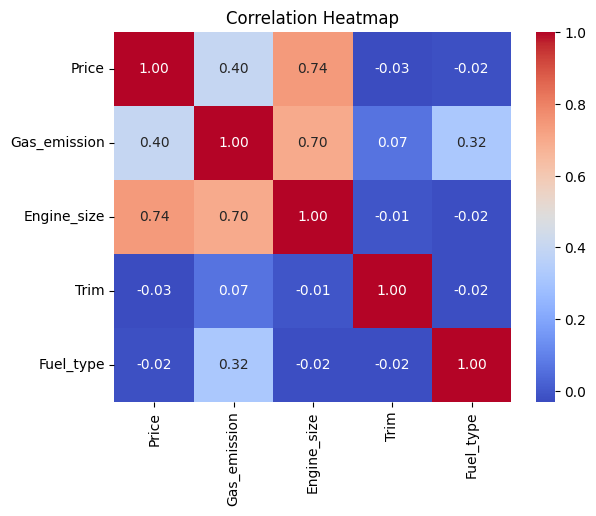

In [18]:
# Correlation heatmap
correlation_matrix = merged_data_left['Price', 'Gas_emission', 'Engine_size', 'Trim', 'Fuel_type'].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

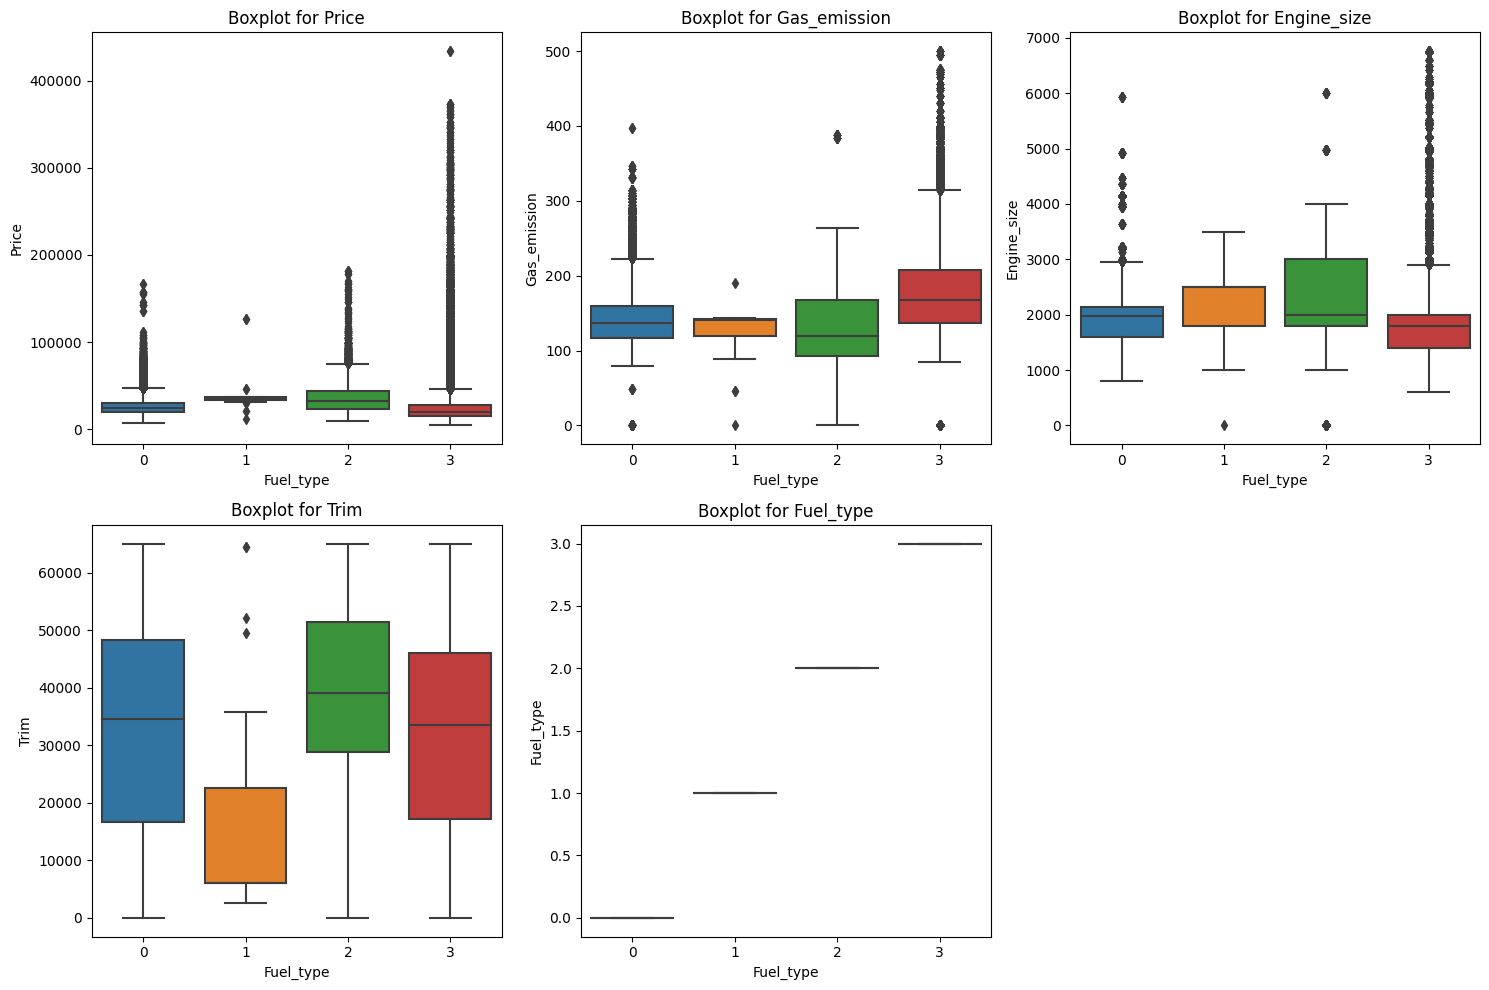

In [19]:
# Boxplots for selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Fuel_type', y=feature, data=merged_data_left)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

In [20]:
# Model Evaluation
def evaluate_model(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    return mse, r2

#**Price Prediction**

In [39]:
# Creating Feature and Target Variables
features_price = merged_data_left.drop(['Price'], axis=1)
target_price = merged_data_left['Price']

#Splitting data into training and test
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(features_price, target_price, test_size=0.2, random_state=42)


In [41]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(features_price, target_price, test_size=0.2, random_state=42)
'''X_train_price = X_train_price.reshape(1, -1)
X_test_price = X_test_price.reshape(1, -1)'''

'X_train_price = X_train_price.reshape(1, -1)\nX_test_price = X_test_price.reshape(1, -1)'

In [23]:

# Linear Regression for Price Prediction
lr_price_model = LinearRegression()
lr_price_model.fit(X_train_price, y_train_price)
lr_price_predictions = lr_price_model.predict(X_test_price)

# Random Forest for Price Prediction
rf_price_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_price_model.fit(X_train_price, y_train_price)
rf_price_predictions = rf_price_model.predict(X_test_price)

# KNN for Price Prediction
knn_price_model = KNeighborsRegressor(n_neighbors=5)
knn_price_model.fit(X_train_price, y_train_price)
knn_price_predictions = knn_price_model.predict(X_test_price)


In [24]:
knn_price_predictions

array([15880., 15796., 64929., ..., 25336., 10409., 22159.])

In [25]:
#Rounding up nearest integer
lr_price_predictions_class = np.round(lr_price_predictions).astype(int)

# Compute metrics for Price Prediction
accuracy_price = accuracy_score(y_test_price, lr_price_predictions_class)
precision_price = precision_score(y_test_price, lr_price_predictions_class, average='weighted')
recall_price = recall_score(y_test_price, lr_price_predictions_class, average='weighted')
f1_price = f1_score(y_test_price, lr_price_predictions_class, average='weighted')

# Print or use the metrics as needed
print("Price Prediction Metrics:")
print(f"Accuracy: {accuracy_price}")
print(f"Precision: {precision_price}")
print(f"Recall: {recall_price}")
print(f"F1 Score: {f1_price}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Price Prediction Metrics:
Accuracy: 2.8283742504808235e-05
Precision: 9.798296510594282e-05
Recall: 2.8283742504808235e-05
F1 Score: 4.389555736409307e-05


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import binarize

#threshold for classification
threshold = 0.5

# Convert regression predictions to binary classes
lr_price_predictions_class = binarize([lr_price_predictions], threshold=threshold)[0]

# Convert true values to binary classes
y_test_price_class = binarize([y_test_price], threshold=threshold)[0]

# Calculate classification metrics
accuracy = accuracy_score(y_test_price_class, lr_price_predictions_class)
precision = precision_score(y_test_price_class, lr_price_predictions_class)
recall = recall_score(y_test_price_class, lr_price_predictions_class)
f1 = f1_score(y_test_price_class, lr_price_predictions_class)

print("Price Prediction Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Price Prediction Classification Metrics:
Accuracy: 0.9948665007353773
Precision: 1.0
Recall: 0.9948665007353773
F1 Score: 0.9974266452102283


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import binarize

# threshold for classification
threshold = 0.5

# Convert regression predictions to binary classes
rf_price_predictions_class = binarize([rf_price_predictions], threshold=threshold)[0]

# Convert true values to binary classes
y_test_price_class = binarize([y_test_price], threshold=threshold)[0]

# Calculate classification metrics
accuracy = accuracy_score(y_test_price_class, rf_price_predictions_class)
precision = precision_score(y_test_price_class, rf_price_predictions_class)
recall = recall_score(y_test_price_class, rf_price_predictions_class)
f1 = f1_score(y_test_price_class, rf_price_predictions_class)

print("Price Prediction Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Price Prediction Classification Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [30]:
#threshold for classification
threshold = 0.5

# Convert regression predictions to binary classes
knn_price_predictions_class = binarize([knn_price_predictions], threshold=threshold)[0]

# Convert true values to binary classes
y_test_price_class = binarize([y_test_price], threshold=threshold)[0]

# Calculate classification metrics
accuracy = accuracy_score(y_test_price_class, knn_price_predictions_class)
precision = precision_score(y_test_price_class, knn_price_predictions_class)
recall = recall_score(y_test_price_class, knn_price_predictions_class)
f1 = f1_score(y_test_price_class, knn_price_predictions_class)

print("Price Prediction Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Price Prediction Classification Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [31]:
# Evaluate Price Prediction models
lr_price_mse, lr_price_r2 = evaluate_model(lr_price_predictions, y_test_price)
rf_price_mse, rf_price_r2 = evaluate_model(rf_price_predictions, y_test_price)
knn_price_mse, knn_price_r2 = evaluate_model(knn_price_predictions, y_test_price)

print(f"Price Prediction - Linear Regression MSE: {lr_price_mse}, R2 Score: {lr_price_r2}")
print(f"Price Prediction - Random Forest MSE: {rf_price_mse}, R2 Score: {rf_price_r2}")
print(f"Price Prediction - KNN MSE: {knn_price_mse}, R2 Score: {knn_price_r2}")

Price Prediction - Linear Regression MSE: 98083194.16083308, R2 Score: 0.6476325068123294
Price Prediction - Random Forest MSE: 4862253.675727514, R2 Score: 0.9825321743075655
Price Prediction - KNN MSE: 4977051.391084964, R2 Score: 0.9821197592804014


# **Sales Prediction**

In [ ]:
# Sales Prediction
features_sales = merged_data_left.drop(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001'], axis=1)
target_sales = merged_data_left[['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']]
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(features_sales, target_sales, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression for Sales Prediction
lr_sales_model = LinearRegression()
lr_sales_model.fit(X_train_sales, y_train_sales)
lr_sales_predictions = lr_sales_model.predict(X_test_sales)

# Random Forest for Sales Prediction
rf_sales_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sales_model.fit(X_train_sales, y_train_sales)
rf_sales_predictions = rf_sales_model.predict(X_test_sales)

# KNN for Sales Prediction
knn_sales_model = KNeighborsRegressor(n_neighbors=5)
knn_sales_model.fit(X_train_sales, y_train_sales)
knn_sales_predictions = knn_sales_model.predict(X_test_sales)

In [ ]:
knn_sales_predictions

array([[4.6739e+04, 7.4500e+04, 8.9564e+04, ..., 3.2345e+04, 1.7090e+04,
        6.4450e+03],
       [1.1000e+03, 2.5250e+03, 2.1110e+03, ..., 5.6990e+03, 6.7800e+03,
        4.8060e+03],
       [9.9600e+01, 2.4000e+02, 4.2600e+02, ..., 1.6088e+03, 7.7380e+02,
        8.7260e+02],
       ...,
       [9.6760e+03, 2.1683e+04, 2.8412e+04, ..., 1.0175e+04, 6.2500e+03,
        3.4430e+03],
       [1.3250e+03, 7.4080e+03, 1.2737e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 1.1210e+03, 1.2484e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

##*Sales: Linear Regression*

In [ ]:
from google.colab import drive

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

lr_sales_predictions_class = np.round(lr_sales_predictions).astype(int)

# Convert the true values to binary classes
mlb = MultiLabelBinarizer()
y_test_sales_bin = mlb.fit_transform(y_test_sales.values)

# Convert the predictions to binary classes
lr_sales_predictions_bin = mlb.transform(lr_sales_predictions_class)

# Calculate classification metrics
accuracy_sales = accuracy_score(y_test_sales_bin, lr_sales_predictions_bin)
precision_sales = precision_score(y_test_sales_bin, lr_sales_predictions_bin, average='weighted')
recall_sales = recall_score(y_test_sales_bin, lr_sales_predictions_bin, average='weighted')
f1_sales = f1_score(y_test_sales_bin, lr_sales_predictions_bin, average='weighted')

print("Sales Prediction Classification Metrics:")
print(f"Accuracy: {accuracy_sales}")
print(f"Precision: {precision_sales}")
print(f"Recall: {recall_sales}")

print(f"F1 Score: {f1_sales}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [-1, -10, -100, -1000, -10000, -10003, -10004, -10005, -10006, -10007, -10008, -10009, -1001, -10011, -10012, -10014, -10015, -10017, -10018, -1002, -10020, -10022, -10023, -10026, -10027, -10028, -10029, -1003, -10030, -10031, -10032, -10033, -10034, -10037, -1004, -10042, -10043, -10045, -10046, -10047, -10049, -1005, -10050, -10052, -10054, -10055, -10056, -10057, -10058, -10059, -1006, -10060, -10061, -10063, -10064, -10065, -10067, -10068, -10069, -1007, -10071, -10073, -10075, -10076, -10077, -10078, -1008, -10080, -10081, -10083, -10084, -10086, -10088, -10089, -1009, -10090, -10091, -10092, -10093, -10094, -10095, -10096, -10097, -101, -1010, -10100, -10101, -10103, -10104, -10105, -10108, -10109, -1011, -10112, -10114, -10115, -10116, -10118, -1012, -10122, -10124, -10125, -10127, -10128, -10129, -1013, -10130, -10131, -10135, -10136, -10137, -10138, -10139, -1014, -1014

Sales Prediction Classification Metrics:
Accuracy: 0.0
Precision: 0.04626419442825298
Recall: 0.0006852654264455956
F1 Score: 0.0011747555514793756


##*Sales: Random Forest*

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

rf_sales_predictions_class = np.round(rf_sales_predictions).astype(int)

# Convert the true values to binary classes
mlb = MultiLabelBinarizer()
y_test_sales_bin = mlb.fit_transform(y_test_sales.values)

# Convert the predictions to binary classes
rf_sales_predictions_bin = mlb.transform(rf_sales_predictions_class)

# Calculate classification metrics
accuracy_sales = accuracy_score(y_test_sales_bin, rf_sales_predictions_bin)
precision_sales = precision_score(y_test_sales_bin, rf_sales_predictions_bin, average='weighted')
recall_sales = recall_score(y_test_sales_bin, rf_sales_predictions_bin, average='weighted')
f1_sales = f1_score(y_test_sales_bin, rf_sales_predictions_bin, average='weighted')

print("Sales Prediction Classification Metrics:")
print(f"Accuracy: {accuracy_sales}")
print(f"Precision: {precision_sales}")
print(f"Recall: {recall_sales}")

print(f"F1 Score: {f1_sales}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 1001, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10019, 1002, 10020, 10022, 10023, 10024, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10039, 1004, 10040, 10041, 10042, 10043, 10044, 10045, 10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10061, 10062, 10063, 10064, 10065, 10066, 10067, 10068, 10069, 1007, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080, 10081, 10082, 10083, 10084, 10085, 10086, 10087, 10088, 10089, 1009, 10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10099, 1010, 10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108, 10109, 1011, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117, 10118, 10119, 10120, 10121, 10123, 10124, 10125, 10126, 10127, 10

Sales Prediction Classification Metrics:
Accuracy: 0.8445384093223215
Precision: 0.8778885713099969
Recall: 0.8848125316092347
F1 Score: 0.8714743041503068


##*Sales: KNN*

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

knn_sales_predictions_class = np.round(knn_sales_predictions).astype(int)

# Convert the true values to binary classes
mlb = MultiLabelBinarizer()
y_test_sales_bin = mlb.fit_transform(y_test_sales.values)

# Convert the predictions to binary classes
knn_sales_predictions_bin = mlb.transform(knn_sales_predictions_class)

# Calculate classification metrics
accuracy_sales = accuracy_score(y_test_sales_bin, knn_sales_predictions_bin)
precision_sales = precision_score(y_test_sales_bin, knn_sales_predictions_bin, average='weighted')
recall_sales = recall_score(y_test_sales_bin, knn_sales_predictions_bin, average='weighted')
f1_sales = f1_score(y_test_sales_bin, knn_sales_predictions_bin, average='weighted')

print("Sales Prediction Classification Metrics:")
print(f"Accuracy: {accuracy_sales}")
print(f"Precision: {precision_sales}")
print(f"Recall: {recall_sales}")

print(f"F1 Score: {f1_sales}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [1001, 10011, 10015, 10016, 1002, 10022, 10026, 10033, 10037, 1004, 10040, 10042, 10043, 10048, 100495, 10055, 10056, 10064, 1007, 10071, 10074, 10076, 10077, 10078, 10080, 10084, 10086, 10088, 1009, 10090, 10091, 10092, 1010, 10100, 10101, 10105, 1011, 10110, 10113, 10115, 10137, 10138, 10142, 10145, 10151, 10153, 10154, 10155, 10156, 1016, 10165, 10169, 1017, 10177, 10178, 1018, 10185, 10186, 10190, 10194, 10196, 10199, 1020, 10205, 10209, 10213, 10215, 1022, 10228, 10230, 10235, 10237, 1024, 10241, 10243, 10248, 10252, 10254, 10255, 10256, 10260, 10261, 10262, 10263, 10264, 10265, 10266, 10268, 10276, 10279, 10288, 10289, 1029, 10290, 10294, 10297, 1030, 10300, 10302, 10305, 10309, 1031, 10310, 10315, 10316, 10326, 10333, 10342, 10344, 10356, 10360, 10361, 10362, 10363, 10364, 10369, 1037, 10371, 10380, 10381, 103828, 10383, 1039, 10396, 10399, 10404, 10405, 1041, 10414, 10423

Sales Prediction Classification Metrics:
Accuracy: 0.7940348743476969
Precision: 0.8753232885400432
Recall: 0.8439220424506715
F1 Score: 0.8495153101138857


In [ ]:
# Evaluate Sales Prediction models
lr_sales_mse, lr_sales_r2 = evaluate_model(lr_sales_predictions, y_test_sales)
rf_sales_mse, rf_sales_r2 = evaluate_model(rf_sales_predictions, y_test_sales)
knn_sales_mse, knn_sales_r2 = evaluate_model(knn_sales_predictions, y_test_sales)

print(f"Sales Prediction - Linear Regression MSE: {lr_sales_mse}, R2 Score: {lr_sales_r2}")
print(f"Sales Prediction - Random Forest MSE: {rf_sales_mse}, R2 Score: {rf_sales_r2}")
print(f"Sales Prediction - KNN MSE: {knn_sales_mse}, R2 Score: {knn_sales_r2}")

Sales Prediction - Linear Regression MSE: 215123739.1165329, R2 Score: 0.15149062294656573
Sales Prediction - Random Forest MSE: 14865744.77416272, R2 Score: 0.9359011234582523
Sales Prediction - KNN MSE: 11601397.931722593, R2 Score: 0.9507895036950341


#**Gas Emission Prediction**

In [ ]:
# Gas Emission Prediction
features_gas_emission = merged_data_left.drop(['Gas_emission'], axis=1)
target_gas_emission = merged_data_left['Gas_emission']
X_train_gas_emission, X_test_gas_emission, y_train_gas_emission, y_test_gas_emission = train_test_split(features_gas_emission, target_gas_emission, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression for Gas Emission Prediction
lr_gas_emission_model = LinearRegression()
lr_gas_emission_model.fit(X_train_gas_emission, y_train_gas_emission)
lr_gas_emission_predictions = lr_gas_emission_model.predict(X_test_gas_emission)

# Random Forest for Gas Emission Prediction
rf_gas_emission_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_gas_emission_model.fit(X_train_gas_emission, y_train_gas_emission)
rf_gas_emission_predictions = rf_gas_emission_model.predict(X_test_gas_emission)

# KNN for Gas Emission Prediction
knn_gas_emission_model = KNeighborsRegressor(n_neighbors=5)
knn_gas_emission_model.fit(X_train_gas_emission, y_train_gas_emission)
knn_gas_emission_predictions = knn_gas_emission_model.predict(X_test_gas_emission)

##*Gas Emission: Linear Regression*

In [ ]:
#Rounding up nearest integer
lr_gas_emission_predictions_class = np.round(lr_gas_emission_predictions).astype(int)

# Compute metrics for Price Prediction
accuracy_gas_emission = accuracy_score(y_test_price, lr_gas_emission_predictions_class)
precision_gas_emission = precision_score(y_test_price, lr_gas_emission_predictions_class, average='weighted')
recall_gas_emission = recall_score(y_test_price, lr_gas_emission_predictions_class, average='weighted')
f1_gas_emission = f1_score(y_test_price, lr_gas_emission_predictions_class, average='weighted')

print("\nGas Emission Prediction Metrics:")
print(f"Accuracy: {accuracy_gas_emission}")
print(f"Precision: {precision_gas_emission}")
print(f"Recall: {recall_gas_emission}")
print(f"F1 Score: {f1_gas_emission}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gas Emission Prediction Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


##*Gas Emission: Random Forest*

In [ ]:
rf_gas_emission_predictions_class = np.round(rf_gas_emission_predictions).astype(int)

# Compute metrics for Gas Emission Prediction
accuracy_gas_emission = accuracy_score(y_test_gas_emission, rf_gas_emission_predictions_class)
precision_gas_emission = precision_score(y_test_gas_emission, rf_gas_emission_predictions_class, average='weighted')
recall_gas_emission = recall_score(y_test_gas_emission, rf_gas_emission_predictions_class, average='weighted')
f1_gas_emission = f1_score(y_test_gas_emission, rf_gas_emission_predictions_class, average='weighted')

print("\nGas Emission Prediction Metrics:")
print(f"Accuracy: {accuracy_gas_emission}")
print(f"Precision: {precision_gas_emission}")
print(f"Recall: {recall_gas_emission}")
print(f"F1 Score: {f1_gas_emission}")


Gas Emission Prediction Metrics:
Accuracy: 0.38823679149225027
Precision: 0.416543742797515
Recall: 0.38823679149225027
F1 Score: 0.39388972161354413


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##*Gas Emission: KNN*

In [ ]:
#Rounding up nearest integer
knn_gas_emission_predictions_class = np.round(rf_gas_emission_predictions).astype(int)

# Compute metrics for Price Prediction
accuracy_gas_emission = accuracy_score(y_test_price, knn_gas_emission_predictions_class)
precision_gas_emission = precision_score(y_test_price, knn_gas_emission_predictions_class, average='weighted')
recall_gas_emission = recall_score(y_test_price, knn_gas_emission_predictions_class, average='weighted')
f1_gas_emission = f1_score(y_test_price, knn_gas_emission_predictions_class, average='weighted')

print("\nGas Emission Prediction Metrics:")
print(f"Accuracy: {accuracy_gas_emission}")
print(f"Precision: {precision_gas_emission}")
print(f"Recall: {recall_gas_emission}")
print(f"F1 Score: {f1_gas_emission}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gas Emission Prediction Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [ ]:
# Evaluate Gas Emission Prediction models
lr_gas_emission_mse, lr_gas_emission_r2 = evaluate_model(lr_gas_emission_predictions, y_test_gas_emission)
rf_gas_emission_mse, rf_gas_emission_r2 = evaluate_model(rf_gas_emission_predictions, y_test_gas_emission)
knn_gas_emission_mse, knn_gas_emission_r2 = evaluate_model(knn_gas_emission_predictions, y_test_gas_emission)

print(f"Gas Emission Prediction - Linear Regression MSE: {lr_gas_emission_mse}, R2 Score: {lr_gas_emission_r2}")
print(f"Gas Emission Prediction - Random Forest MSE: {rf_gas_emission_mse}, R2 Score: {rf_gas_emission_r2}")
print(f"Gas Emission Prediction - KNN MSE: {knn_gas_emission_mse}, R2 Score: {knn_gas_emission_r2}")

Gas Emission Prediction - Linear Regression MSE: 563.1469033417077, R2 Score: 0.7779153674532944
Gas Emission Prediction - Random Forest MSE: 32.96548879296969, R2 Score: 0.9869996116077959
Gas Emission Prediction - KNN MSE: 291.06758174001584, R2 Score: 0.885213544541563


#**Engine Level Prediction**

In [ ]:
# Engine Size Prediction
features_engine_size = merged_data_left.drop(['Engine_size'], axis=1)
target_engine_size = merged_data_left['Engine_size']
X_train_engine_size, X_test_engine_size, y_train_engine_size, y_test_engine_size = train_test_split(features_engine_size, target_engine_size, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression for Engine Size Prediction
lr_engine_size_model = LinearRegression()
lr_engine_size_model.fit(X_train_engine_size, y_train_engine_size)
lr_engine_size_predictions = lr_engine_size_model.predict(X_test_engine_size)

# Random Forest for Engine Size Prediction
rf_engine_size_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_engine_size_model.fit(X_train_engine_size, y_train_engine_size)
rf_engine_size_predictions = rf_engine_size_model.predict(X_test_engine_size)

# KNN for Engine Size Prediction
knn_engine_size_model = KNeighborsRegressor(n_neighbors=5)
knn_engine_size_model.fit(X_train_engine_size, y_train_engine_size)
knn_engine_size_predictions = knn_engine_size_model.predict(X_test_engine_size)

##*Engine Size: Linear Regression*


In [ ]:
lr_engine_size_predictions_class = np.round(lr_engine_size_predictions).astype(int)

# Compute metrics for Engine Size Prediction
accuracy_engine_size = accuracy_score(y_test_engine_size, lr_engine_size_predictions_class)
precision_engine_size = precision_score(y_test_engine_size, lr_engine_size_predictions_class, average='weighted')
recall_engine_size = recall_score(y_test_engine_size, lr_engine_size_predictions_class, average='weighted')
f1_engine_size = f1_score(y_test_engine_size, lr_engine_size_predictions_class, average='weighted')

print("\nEngine Size Prediction Metrics:")
print(f"Accuracy: {accuracy_engine_size}")
print(f"Precision: {precision_engine_size}")
print(f"Recall: {recall_engine_size}")
print(f"F1 Score: {f1_engine_size}")


Engine Size Prediction Metrics:
Accuracy: 0.0017253082927933025
Precision: 0.07116074498096712
Recall: 0.0017253082927933025
F1 Score: 0.0032301050033222136


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##*Engine Size: Random Forest*

In [ ]:
rf_engine_size_predictions_class = np.round(rf_engine_size_predictions).astype(int)

# Compute metrics for Engine Size Prediction
accuracy_engine_size = accuracy_score(y_test_engine_size, rf_engine_size_predictions_class)
precision_engine_size = precision_score(y_test_engine_size, rf_engine_size_predictions_class, average='weighted')
recall_engine_size = recall_score(y_test_engine_size, rf_engine_size_predictions_class, average='weighted')
f1_engine_size = f1_score(y_test_engine_size, rf_engine_size_predictions_class, average='weighted')

print("\nEngine Size Prediction Metrics:")
print(f"Accuracy: {accuracy_engine_size}")
print(f"Precision: {precision_engine_size}")
print(f"Recall: {recall_engine_size}")
print(f"F1 Score: {f1_engine_size}")


Engine Size Prediction Metrics:
Accuracy: 0.6824442810272655
Precision: 0.9199149632038827
Recall: 0.6824442810272655
F1 Score: 0.775283821107589


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##*Engine Size: KNN*

In [ ]:
knn_engine_size_predictions_class = np.round(knn_engine_size_predictions).astype(int)

# Compute metrics for Engine Size Prediction
accuracy_engine_size = accuracy_score(y_test_engine_size, knn_engine_size_predictions_class)
precision_engine_size = precision_score(y_test_engine_size, knn_engine_size_predictions_class, average='weighted')
recall_engine_size = recall_score(y_test_engine_size, knn_engine_size_predictions_class, average='weighted')
f1_engine_size = f1_score(y_test_engine_size, knn_engine_size_predictions_class, average='weighted')

print("\nEngine Size Prediction Metrics:")
print(f"Accuracy: {accuracy_engine_size}")
print(f"Precision: {precision_engine_size}")
print(f"Recall: {recall_engine_size}")
print(f"F1 Score: {f1_engine_size}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Engine Size Prediction Metrics:
Accuracy: 0.35764792397330014
Precision: 0.7887219470989695
Recall: 0.35764792397330014
F1 Score: 0.476298305238215


In [ ]:
# Evaluate Engine Size Prediction models
lr_engine_size_mse, lr_engine_size_r2 = evaluate_model(lr_engine_size_predictions, y_test_engine_size)
rf_engine_size_mse, rf_engine_size_r2 = evaluate_model(rf_engine_size_predictions, y_test_engine_size)
knn_engine_size_mse, knn_engine_size_r2 = evaluate_model(knn_engine_size_predictions, y_test_engine_size)

print(f"Engine Size Prediction - Linear Regression MSE: {lr_engine_size_mse}, R2 Score: {lr_engine_size_r2}")
print(f"Engine Size Prediction - Random Forest MSE: {rf_engine_size_mse}, R2 Score: {rf_engine_size_r2}")
print(f"Engine Size Prediction - KNN MSE: {knn_engine_size_mse}, R2 Score: {knn_engine_size_r2}")

Engine Size Prediction - Linear Regression MSE: 113067.47910933143, R2 Score: 0.7827209112440174
Engine Size Prediction - Random Forest MSE: 1234.4921141871253, R2 Score: 0.9976277058287675
Engine Size Prediction - KNN MSE: 49472.111378549605, R2 Score: 0.9049306187434173


#**Trim Prediction**

In [ ]:
# Trim Level Prediction
features_trim_level = merged_data_left.drop(['Trim'], axis=1)
target_trim_level = merged_data_left['Trim']
X_train_trim_level, X_test_trim_level, y_train_trim_level, y_test_trim_level = train_test_split(features_trim_level, target_trim_level, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression for Trim Level Prediction
lr_trim_level_model = LinearRegression()
lr_trim_level_model.fit(X_train_trim_level, y_train_trim_level)
lr_trim_level_predictions = lr_trim_level_model.predict(X_test_trim_level)

# Random Forest for Trim Level Prediction
rf_trim_level_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_trim_level_model.fit(X_train_trim_level, y_train_trim_level)
rf_trim_level_predictions = rf_trim_level_model.predict(X_test_trim_level)

# KNN for Trim Level Prediction
knn_trim_level_model = KNeighborsRegressor(n_neighbors=5)
knn_trim_level_model.fit(X_train_trim_level, y_train_trim_level)
knn_trim_level_predictions = knn_trim_level_model.predict(X_test_trim_level)

##*Trim Level: Linear Regression*

In [ ]:
lr_trim_level_predictions_class = np.round(lr_trim_level_predictions).astype(int)

# Compute metrics for Trim Level Prediction
accuracy_trim_level = accuracy_score(y_test_trim_level, lr_trim_level_predictions_class)
precision_trim_level = precision_score(y_test_trim_level, lr_trim_level_predictions_class, average='weighted')
recall_trim_level = recall_score(y_test_trim_level, lr_trim_level_predictions_class, average='weighted')
f1_trim_level = f1_score(y_test_trim_level, lr_trim_level_predictions_class, average='weighted')

print("\nTrim Level Prediction Metrics:")
print(f"Accuracy: {accuracy_trim_level}")
print(f"Precision: {precision_trim_level}")
print(f"Recall: {recall_trim_level}")
print(f"F1 Score: {f1_trim_level}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Trim Level Prediction Metrics:
Accuracy: 0.0001697024550288494
Precision: 0.00022579854433005242
Recall: 0.0001697024550288494
F1 Score: 0.00016394469316179916


##*Trim Level: Random Forest*

In [ ]:
rf_trim_level_predictions_class = np.round(rf_trim_level_predictions).astype(int)

# Compute metrics for Trim Level Prediction
accuracy_trim_level = accuracy_score(y_test_trim_level, rf_trim_level_predictions_class)
precision_trim_level = precision_score(y_test_trim_level, rf_trim_level_predictions_class, average='weighted')
recall_trim_level = recall_score(y_test_trim_level, rf_trim_level_predictions_class, average='weighted')
f1_trim_level = f1_score(y_test_trim_level, rf_trim_level_predictions_class, average='weighted')

print("\nTrim Level Prediction Metrics:")
print(f"Accuracy: {accuracy_trim_level}")
print(f"Precision: {precision_trim_level}")
print(f"Recall: {recall_trim_level}")
print(f"F1 Score: {f1_trim_level}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Trim Level Prediction Metrics:
Accuracy: 0.17356318588075575
Precision: 0.17466115948138872
Recall: 0.17356318588075575
F1 Score: 0.1627496613036963


##*Trim Level: KNN*

In [ ]:
knn_trim_level_predictions_class = np.round(knn_trim_level_predictions).astype(int)

# Compute metrics for Trim Level Prediction
accuracy_trim_level = accuracy_score(y_test_trim_level, knn_trim_level_predictions_class)
precision_trim_level = precision_score(y_test_trim_level, knn_trim_level_predictions_class, average='weighted')
recall_trim_level = recall_score(y_test_trim_level, knn_trim_level_predictions_class, average='weighted')
f1_trim_level = f1_score(y_test_trim_level, knn_trim_level_predictions_class, average='weighted')

print("\nTrim Level Prediction Metrics:")
print(f"Accuracy: {accuracy_trim_level}")
print(f"Precision: {precision_trim_level}")
print(f"Recall: {recall_trim_level}")
print(f"F1 Score: {f1_trim_level}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Trim Level Prediction Metrics:
Accuracy: 0.0384658898065392
Precision: 0.03597739626505151
Recall: 0.0384658898065392
F1 Score: 0.033367592567638


In [ ]:
# Evaluate Trim Level Prediction models
lr_trim_level_mse, lr_trim_level_r2 = evaluate_model(lr_trim_level_predictions, y_test_trim_level)
rf_trim_level_mse, rf_trim_level_r2 = evaluate_model(rf_trim_level_predictions, y_test_trim_level)
knn_trim_level_mse, knn_trim_level_r2 = evaluate_model(knn_trim_level_predictions, y_test_trim_level)

print(f"Trim Level Prediction - Linear Regression MSE: {lr_trim_level_mse}, R2 Score: {lr_trim_level_r2}")
print(f"Trim Level Prediction - Random Forest MSE: {rf_trim_level_mse}, R2 Score: {rf_trim_level_r2}")
print(f"Trim Level Prediction - KNN MSE: {knn_trim_level_mse}, R2 Score: {knn_trim_level_r2}")

Trim Level Prediction - Linear Regression MSE: 29811553.277521387, R2 Score: 0.9084609631090551
Trim Level Prediction - Random Forest MSE: 652153.1019801726, R2 Score: 0.9979975056547717
Trim Level Prediction - KNN MSE: 2572534.472705623, R2 Score: 0.9921008031413852


#**Fuel Type Prediction**

In [32]:
# Fuel Type Prediction
features_fuel_type = merged_data_left.drop(['Fuel_type'], axis=1)
target_fuel_type = merged_data_left['Fuel_type']
X_train_fuel_type, X_test_fuel_type, y_train_fuel_type, y_test_fuel_type = train_test_split(features_fuel_type, target_fuel_type, test_size=0.2, random_state=42)


In [33]:
# Linear Regression for Fuel Type Prediction
lr_fuel_type_model = LinearRegression()
lr_fuel_type_model.fit(X_train_fuel_type, y_train_fuel_type)
lr_fuel_type_predictions = lr_fuel_type_model.predict(X_test_fuel_type)

# Random Forest for Fuel Type Prediction
rf_fuel_type_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fuel_type_model.fit(X_train_fuel_type, y_train_fuel_type)
rf_fuel_type_predictions = rf_fuel_type_model.predict(X_test_fuel_type)

# KNN for Fuel Type Prediction
knn_fuel_type_model = KNeighborsRegressor(n_neighbors=5)
knn_fuel_type_model.fit(X_train_fuel_type, y_train_fuel_type)
knn_fuel_type_predictions = knn_fuel_type_model.predict(X_test_fuel_type)


##*Fuel Type: Liner Regression*

In [34]:
lr_fuel_type_predictions_class = np.round(lr_fuel_type_predictions).astype(int)

# Compute metrics for Fuel Type Prediction
accuracy_fuel_type = accuracy_score(y_test_fuel_type, lr_fuel_type_predictions_class)
precision_fuel_type = precision_score(y_test_fuel_type, lr_fuel_type_predictions_class, average='weighted')
recall_fuel_type = recall_score(y_test_fuel_type, lr_fuel_type_predictions_class, average='weighted')
f1_fuel_type = f1_score(y_test_fuel_type, lr_fuel_type_predictions_class, average='weighted')

print("\nFuel Type Prediction Metrics:")
print(f"Accuracy: {accuracy_fuel_type}")
print(f"Precision: {precision_fuel_type}")
print(f"Recall: {recall_fuel_type}")
print(f"F1 Score: {f1_fuel_type}")


Fuel Type Prediction Metrics:
Accuracy: 0.14129143568276956
Precision: 0.7366280013110278
Recall: 0.14129143568276956
F1 Score: 0.2292410121233764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##*Fuel Type: Random Forest*

In [35]:
rf_fuel_type_predictions_class = np.round(rf_fuel_type_predictions).astype(int)

# Compute metrics for Fuel Type Prediction
accuracy_fuel_type = accuracy_score(y_test_fuel_type, rf_fuel_type_predictions_class)
precision_fuel_type = precision_score(y_test_fuel_type, rf_fuel_type_predictions_class, average='weighted')
recall_fuel_type = recall_score(y_test_fuel_type, rf_fuel_type_predictions_class, average='weighted')
f1_fuel_type = f1_score(y_test_fuel_type, rf_fuel_type_predictions_class, average='weighted')

print("\nFuel Type Prediction Metrics:")
print(f"Accuracy: {accuracy_fuel_type}")
print(f"Precision: {precision_fuel_type}")
print(f"Recall: {recall_fuel_type}")
print(f"F1 Score: {f1_fuel_type}")


Fuel Type Prediction Metrics:
Accuracy: 0.9981474148659351
Precision: 0.9987857696523729
Recall: 0.9981474148659351
F1 Score: 0.9984521144423276


##*Fuel Type: KNN*

In [36]:
knn_fuel_type_predictions_class = np.round(knn_fuel_type_predictions).astype(int)

# Compute metrics for Fuel Type Prediction
accuracy_fuel_type = accuracy_score(y_test_fuel_type, knn_fuel_type_predictions_class)
precision_fuel_type = precision_score(y_test_fuel_type, knn_fuel_type_predictions_class, average='weighted')
recall_fuel_type = recall_score(y_test_fuel_type, knn_fuel_type_predictions_class, average='weighted')
f1_fuel_type = f1_score(y_test_fuel_type, knn_fuel_type_predictions_class, average='weighted')

print("\nFuel Type Prediction Metrics:")
print(f"Accuracy: {accuracy_fuel_type}")
print(f"Precision: {precision_fuel_type}")
print(f"Recall: {recall_fuel_type}")
print(f"F1 Score: {f1_fuel_type}")


Fuel Type Prediction Metrics:
Accuracy: 0.7138816608213598
Precision: 0.949829303595221
Recall: 0.7138816608213598
F1 Score: 0.8050522553954704


In [37]:
# Evaluate Fuel Type Prediction models
lr_fuel_type_mse, lr_fuel_type_r2 = evaluate_model(lr_fuel_type_predictions, y_test_fuel_type)
rf_fuel_type_mse, rf_fuel_type_r2 = evaluate_model(rf_fuel_type_predictions, y_test_fuel_type)
knn_fuel_type_mse, knn_fuel_type_r2 = evaluate_model(knn_fuel_type_predictions, y_test_fuel_type)

print(f"Fuel Type Prediction - Linear Regression MSE: {lr_fuel_type_mse}, R2 Score: {lr_fuel_type_r2}")
print(f"Fuel Type Prediction - Random Forest MSE: {rf_fuel_type_mse}, R2 Score: {rf_fuel_type_r2}")
print(f"Fuel Type Prediction - KNN MSE: {knn_fuel_type_mse}, R2 Score: {knn_fuel_type_r2}")

Fuel Type Prediction - Linear Regression MSE: 1.5487648104277627, R2 Score: 0.28015330381208803
Fuel Type Prediction - Random Forest MSE: 0.0030752870799864236, R2 Score: 0.9985706446650565
Fuel Type Prediction - KNN MSE: 0.6568395746125127, R2 Score: 0.6947091033275099
